In [1]:
from src.HestonModel import generate_heston_paths
import numpy as np
import esig
import matplotlib.pyplot as plt
import iisignature
import signatory
import torch
from tqdm.auto import tqdm

In [2]:
# Initial parameters
theta=0.15 #Long run variance θ
kappa=2
v_0 = theta #  Initial variance
rho = 0.6 #Correlation ρ, correlation between the log-returns and volatility of the asset
sigma = 0.6 #Volatility of variance σ
r = 0.04

S = 100
paths = 100000
steps = 100
T = 1

In [3]:
#############################################################################################

In [3]:
# Initial parameters
thetas=0.15 #Long run variance θ
kappas= np.linspace(.5,5.0,50) # Mean reversion κ
v_0s = thetas #  Initial variance
rhos = 0.6 #Correlation ρ, correlation between the log-returns and volatility of the asset
sigmas = 0.6 #Volatility of variance σ
rs = 0.04

S = 100
paths = 100000
steps = 100
T = 1

In [4]:
depth_of_sig=2  #level of truncation of signatures
width_of_sig=3  # prices + sigmas + time_array (parameters for signatures)
sig_keys = esig.sigkeys(width_of_sig, depth_of_sig)
sig_dim=signatory.signature_channels(width_of_sig,depth_of_sig)

In [5]:
# define time_array and empty tensor for prices and sigmas, signatures and expected signatures
time_array = np.arange(steps)
prices_and_sigs_with_time_tensor = torch.zeros((paths,steps, width_of_sig ))
number_of_loops=kappas.shape[0]
sign_ps_signatory_differentranges=torch.zeros((number_of_loops,paths,sig_dim))
Exp_sign_signatory_results=torch.zeros((number_of_loops,sig_dim))
Std_sign_signatory_results=torch.zeros((number_of_loops,sig_dim))
sign_ps_signatory_differentranges[0].shape
number_of_loops
prices_and_sigs_with_time_tensor.shape

torch.Size([100000, 100, 3])

In [7]:
def signatures_calculations_kappas(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths):
    count=0
    for kappa in kappas:
            # Caclulation of 10000 paths of prices and sigmas
            prices_1, sigs_1 = generate_heston_paths(S, T, r, kappa, theta, theta, rho, sigma, steps, paths, return_vol=True)

            for j in range(paths):
                     prices_and_sigs_with_time_tensor[j] = torch.tensor([prices_1[j], sigs_1[j], time_array]).T
                    #     shape of prices_and_sigs_witout_time_tensor=torch.Size([10000, 100, 3])

            sign_ps_signatory_differentranges[count] = signatory.signature(prices_and_sigs_with_time_tensor, depth_of_sig)
            #     shape of  sign_ps_signatory_differentranges=torch.Size([50, 10000, 12])

            Exp_sign_signatory_results[count] = torch.mean(sign_ps_signatory_differentranges[count], axis=0)
            #     shape of  Exp_sign_signatory_results=torch.Size([50, 12])

            Std_sign_signatory_results[count] = torch.std(sign_ps_signatory_differentranges[count],dim=0)
            #     shape of  Std_sign_signatory_results=torch.Size([50, 12])

            count = count + 1
    return sign_ps_signatory_differentranges,Exp_sign_signatory_results, Std_sign_signatory_results

In [8]:
results_kappas=signatures_calculations_kappas(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths)
signatures_results_kappas=results_kappas[0]
Exp_signatures_results_kappas=results_kappas[1]
Std_sign_signatory_kappas=results_kappas[2]

In [9]:
Exp_signatures_results_kappas.shape

torch.Size([50, 12])

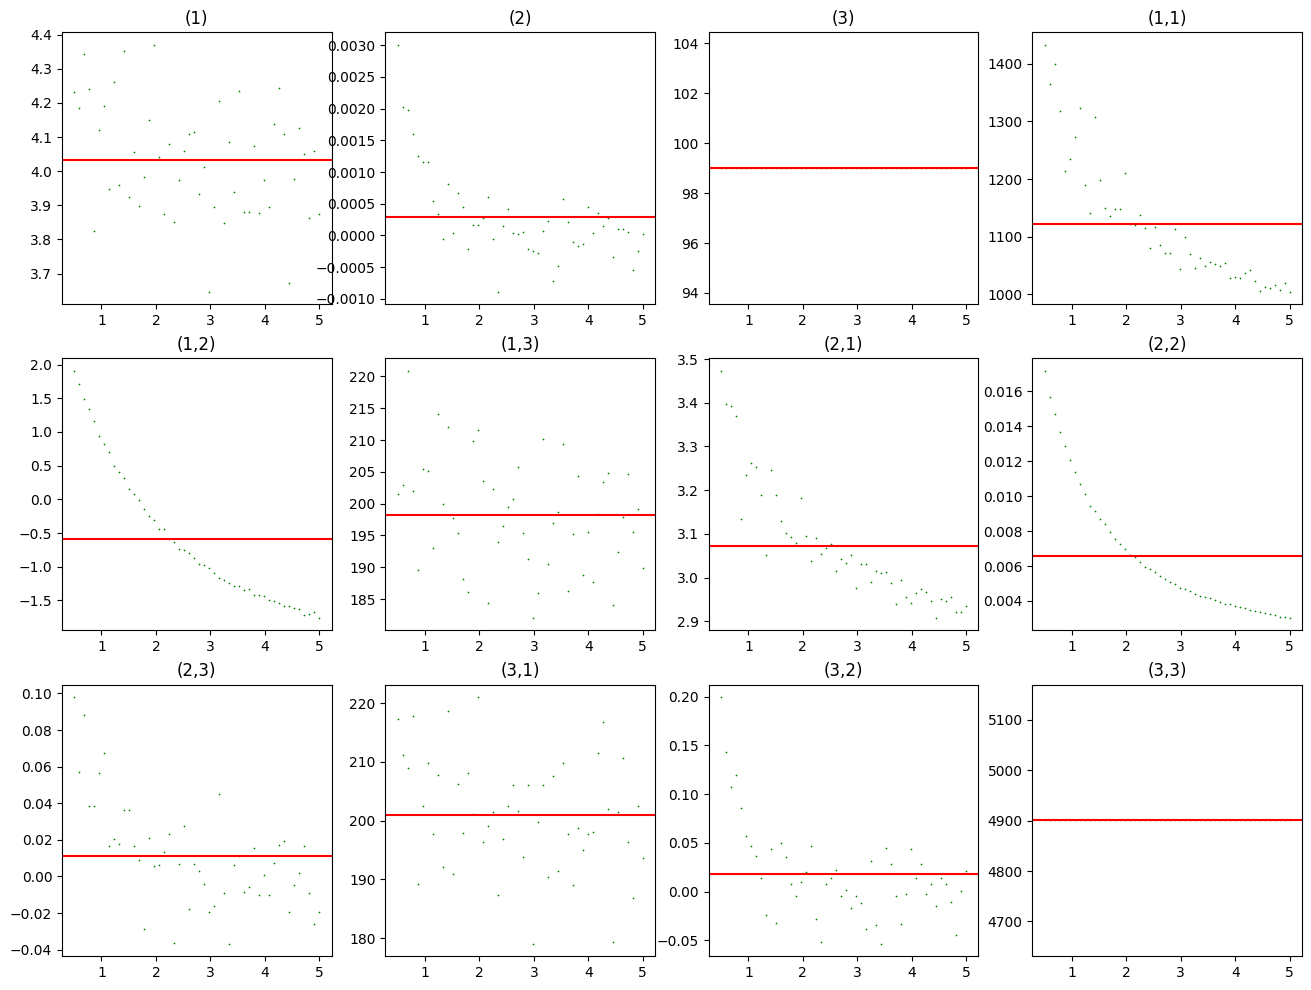

In [13]:
# kappas linspace
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.scatter(kappas,Exp_signatures_results_kappas.T[i], color='green', linewidth=0.15, s=1, alpha=1)
    ax.axhline(torch.mean(Exp_signatures_results_kappas.T[i]), color='red')
    # axs[i].set_xlabel('theta')
    # axs[i].set_ylabel('kappa')

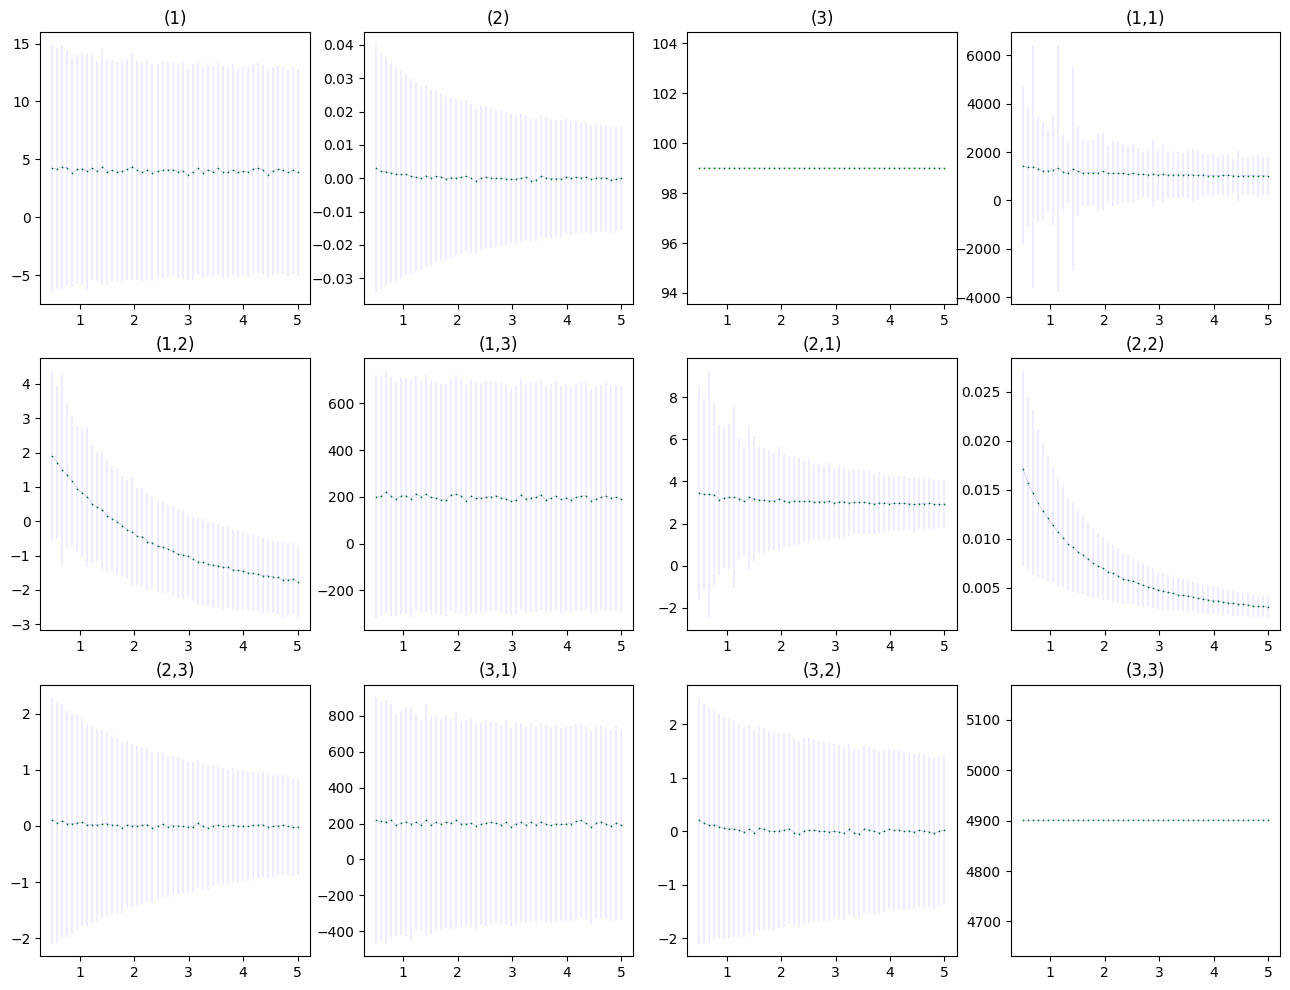

In [14]:
# plots with 0.2*Std
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.scatter(kappas,Exp_signatures_results_kappas.T[i], color='green', linewidth=0.15, s=1, alpha=1)
    ax.errorbar(kappas, Exp_signatures_results_kappas.T[i],0.2*Std_sign_signatory_kappas.T[i], linewidth=0.1, color='blue')
    # axs[i].set_xlabel('theta')
    # axs[i].set_ylabel('kappa')

In [15]:
# Parameters for calculations
thetas=0.15 #Long run variance θ
kappas= 2 # Mean reversion κ
v_0s = thetas #  Initial variance
rhos = np.linspace(0.0,1.0,50) #Correlation ρ, correlation between the log-returns and volatility of the asset
sigmas = 0.6 #Volatility of variance σ
rs = 0.04

S = 100
paths = 100000
steps = 100
T = 1

In [16]:
def signatures_calculations_rhos(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths):
    count=0
    for rho in rhos:
            # Caclulation of 10000 paths of prices and sigmas
            prices_1, sigs_1 = generate_heston_paths(S, T, r, kappa, theta, theta, rho, sigma, steps, paths, return_vol=True)

            for j in range(paths):
                     prices_and_sigs_with_time_tensor[j] = torch.tensor([prices_1[j], sigs_1[j], time_array]).T
                    #     shape of prices_and_sigs_witout_time_tensor=torch.Size([10000, 100, 3])

            sign_ps_signatory_differentranges[count] = signatory.signature(prices_and_sigs_with_time_tensor, depth_of_sig)
            #     shape of  sign_ps_signatory_differentranges=torch.Size([500, 10000, 12])

            Exp_sign_signatory_results[count] = torch.mean(sign_ps_signatory_differentranges[count], axis=0)
            #     shape of  Exp_sign_signatory_results=torch.Size([500, 12])

            Std_sign_signatory_results[count] = torch.std(sign_ps_signatory_differentranges[count],dim=0)
            #     shape of  Std_sign_signatory_results=torch.Size([50, 12])

            count = count + 1
    return sign_ps_signatory_differentranges,Exp_sign_signatory_results,Std_sign_signatory_results

In [17]:
results_rhos=signatures_calculations_rhos(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths)
signatures_results_rhos=results_rhos[0]
Exp_signatures_results_rhos=results_rhos[1]
Std_sign_signatory_rhos=results_rhos[2]

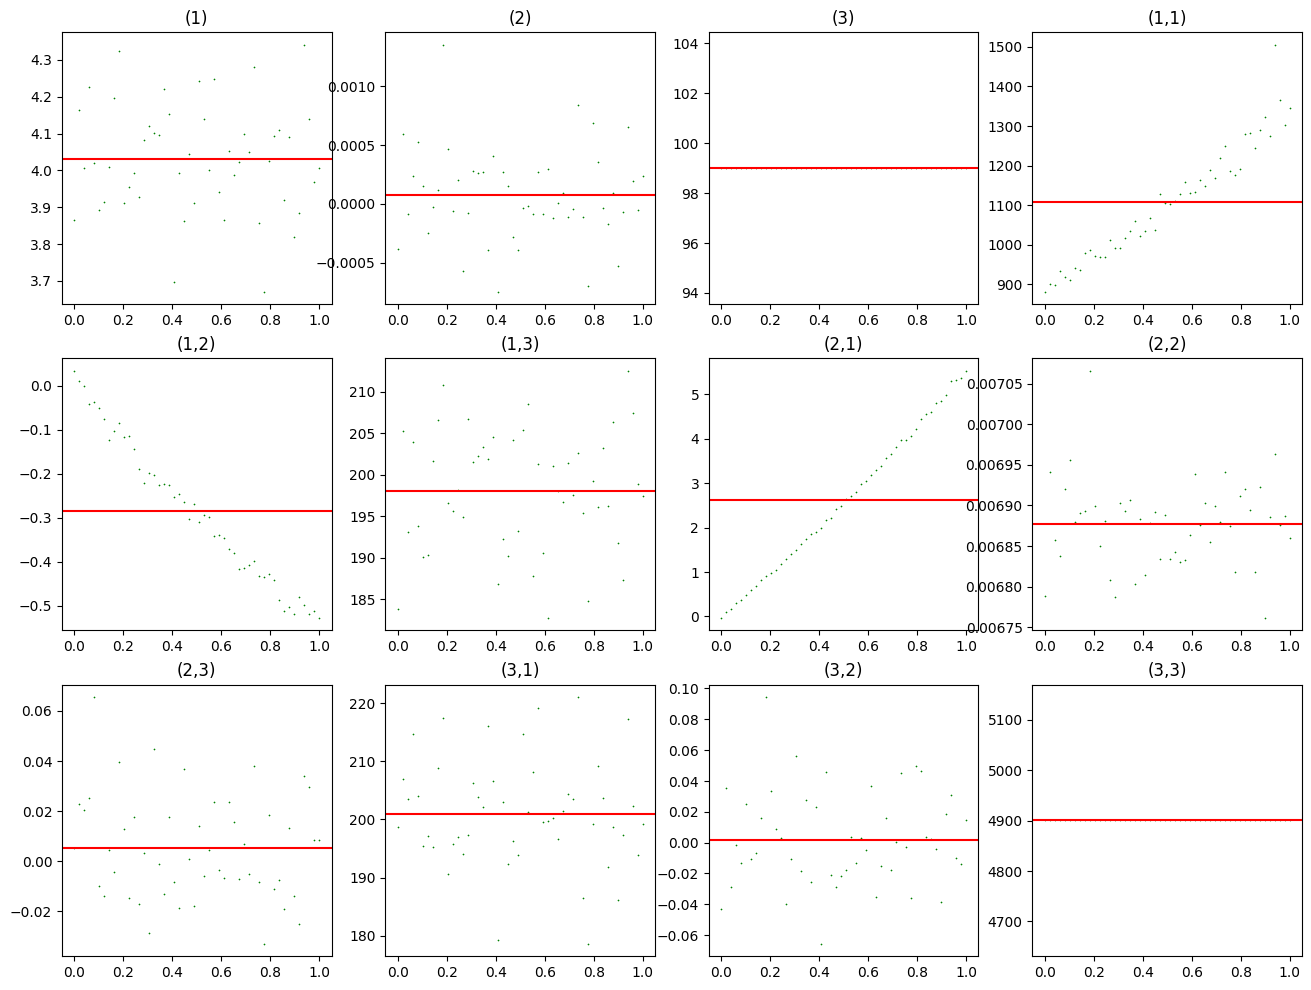

In [18]:
# Plot the scatter plots of components of the expected signatures
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.scatter(rhos,Exp_signatures_results_rhos.T[i], color='green', linewidth=0.15, s=1, alpha=1)
    ax.axhline(torch.mean(Exp_signatures_results_rhos.T[i]), color='red')

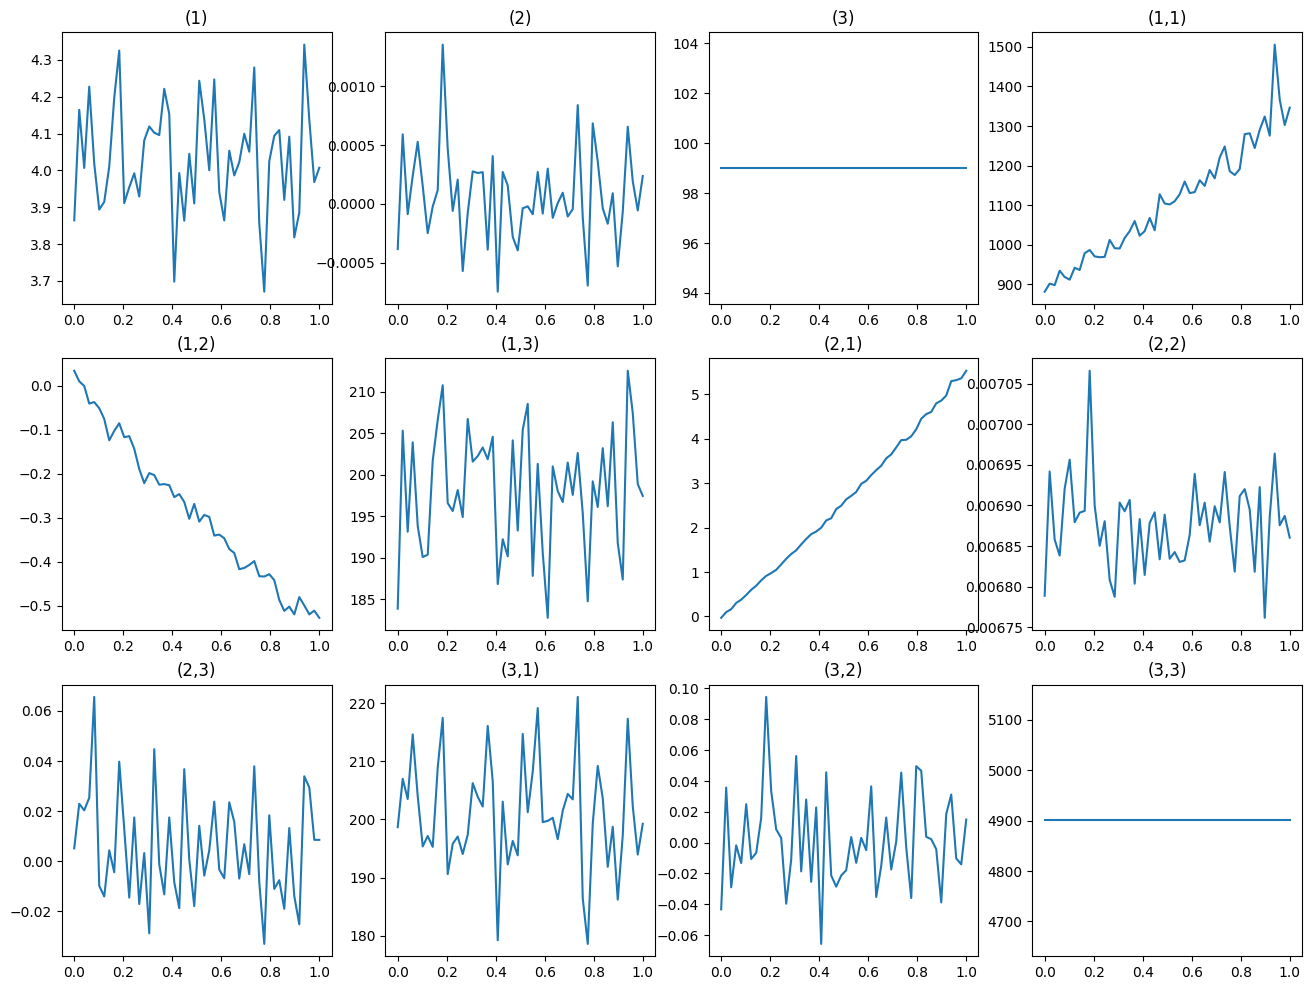

In [19]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.plot(rhos, Exp_signatures_results_rhos.T[i])


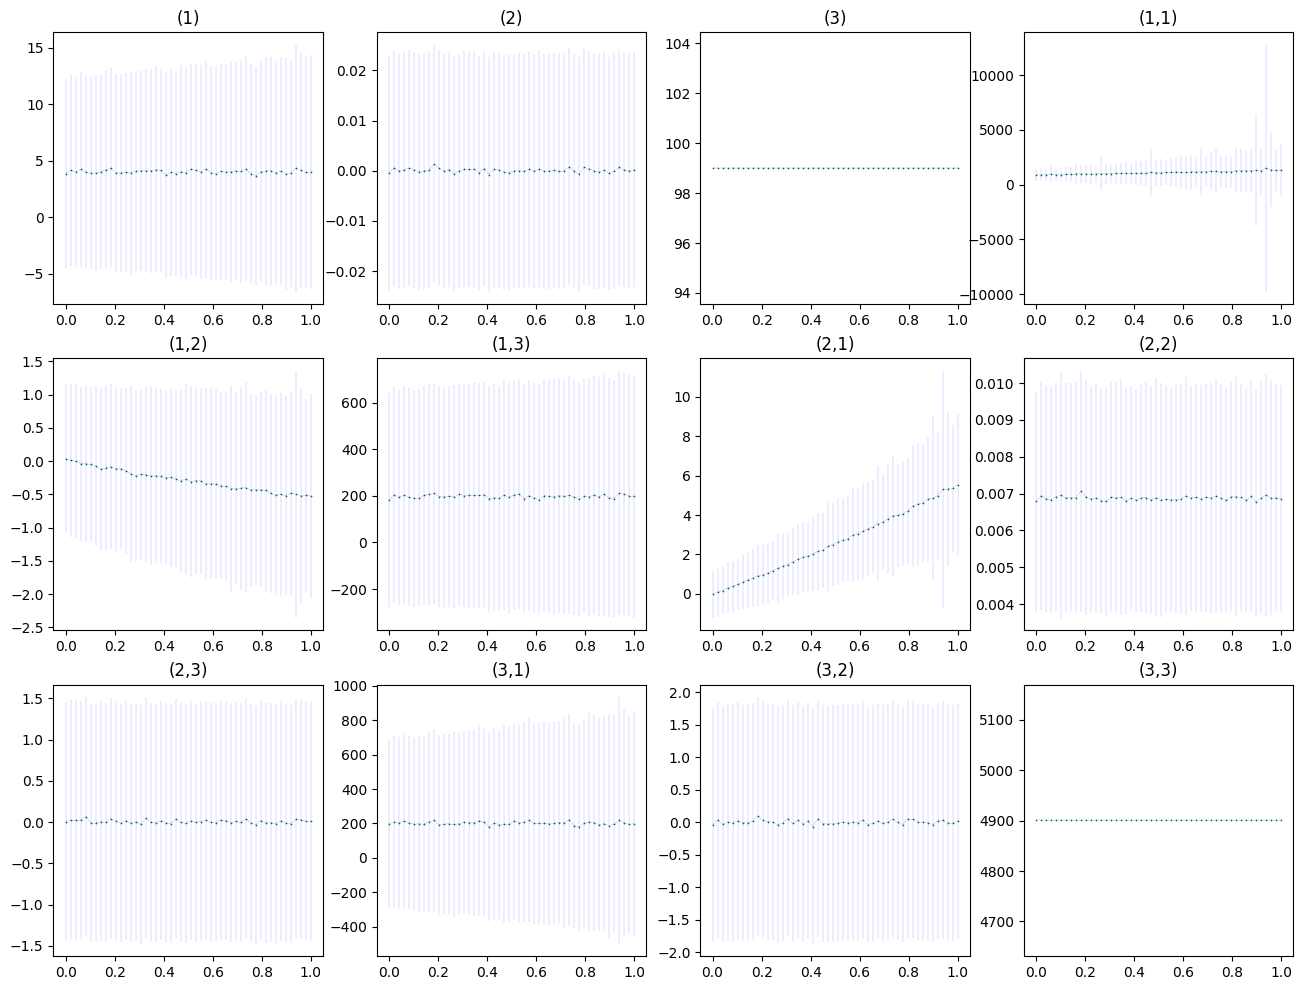

In [20]:
# plots with 0.2*Std
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.scatter(rhos,Exp_signatures_results_rhos.T[i], color='green', linewidth=0.15, s=1, alpha=1)
    ax.errorbar(rhos, Exp_signatures_results_rhos.T[i],0.2*Std_sign_signatory_rhos.T[i], linewidth=0.1, color='blue')


In [21]:
thetas=0.15 #Long run variance θ
kappas= 2 # Mean reversion κ
v_0s = thetas #  Initial variance
rhos = 0.6 #Correlation ρ, correlation between the log-returns and volatility of the asset
sigmas = np.linspace(0.0,1.1,50) #Volatility of variance σ
rs = 0.04

S = 100
paths = 100000
steps = 100
T = 1

In [22]:
def signatures_calculations_sigmas(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths):
    count=0
    for sigma in sigmas:
            # Caclulation of 10000 paths of prices and sigmas
            prices_1, sigs_1 = generate_heston_paths(S, T, r, kappa, theta, theta, rho, sigma, steps, paths, return_vol=True)

            for j in range(paths):
                     prices_and_sigs_with_time_tensor[j] = torch.tensor([prices_1[j], sigs_1[j], time_array]).T
                    #     shape of prices_and_sigs_witout_time_tensor=torch.Size([10000, 100, 3])

            sign_ps_signatory_differentranges[count] = signatory.signature(prices_and_sigs_with_time_tensor, depth_of_sig)
            #     shape of  sign_ps_signatory_differentranges=torch.Size([500, 10000, 12])

            Exp_sign_signatory_results[count] = torch.mean(sign_ps_signatory_differentranges[count], axis=0)
            #     shape of  Exp_sign_signatory_results=torch.Size([500, 12])

            Std_sign_signatory_results[count] = torch.std(sign_ps_signatory_differentranges[count],dim=0)
            #     shape of  Std_sign_signatory_results=torch.Size([50, 12])

            count = count + 1
    return sign_ps_signatory_differentranges,Exp_sign_signatory_results, Std_sign_signatory_results

In [23]:
results_sigmas=signatures_calculations_sigmas(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths)
signatures_results_sigmas=results_sigmas[0]
Exp_signatures_results_sigmas=results_sigmas[1]
Std_sign_signatory_sigmas=results_sigmas[2]

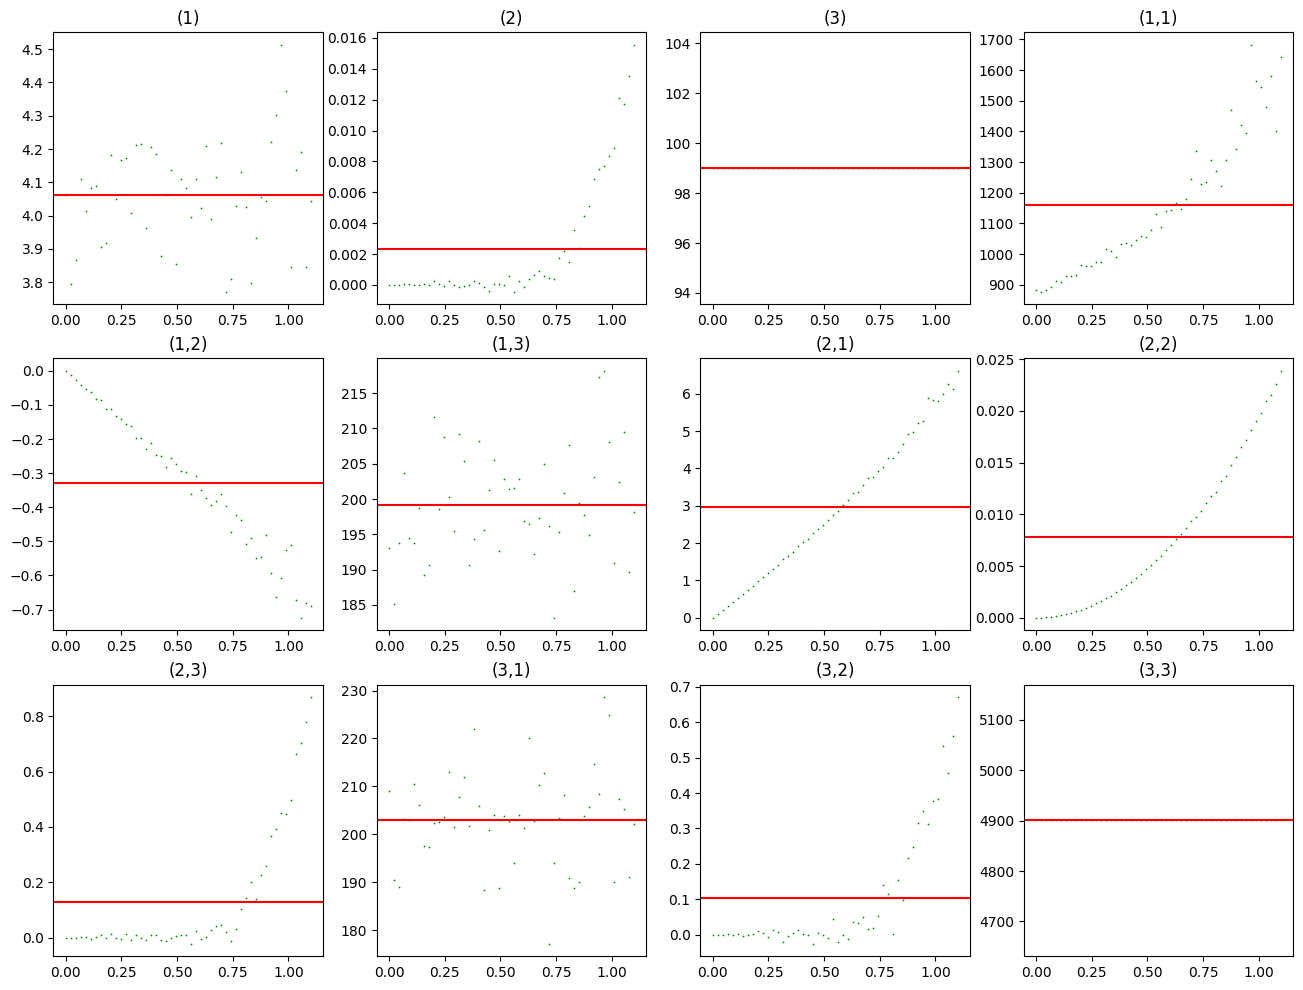

In [24]:
# Plot the scatter plots of components of the expected signatures
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.scatter(sigmas,Exp_signatures_results_sigmas.T[i], color='green', linewidth=0.15, s=1, alpha=1)
    ax.axhline(torch.mean(Exp_signatures_results_sigmas.T[i]), color='red')


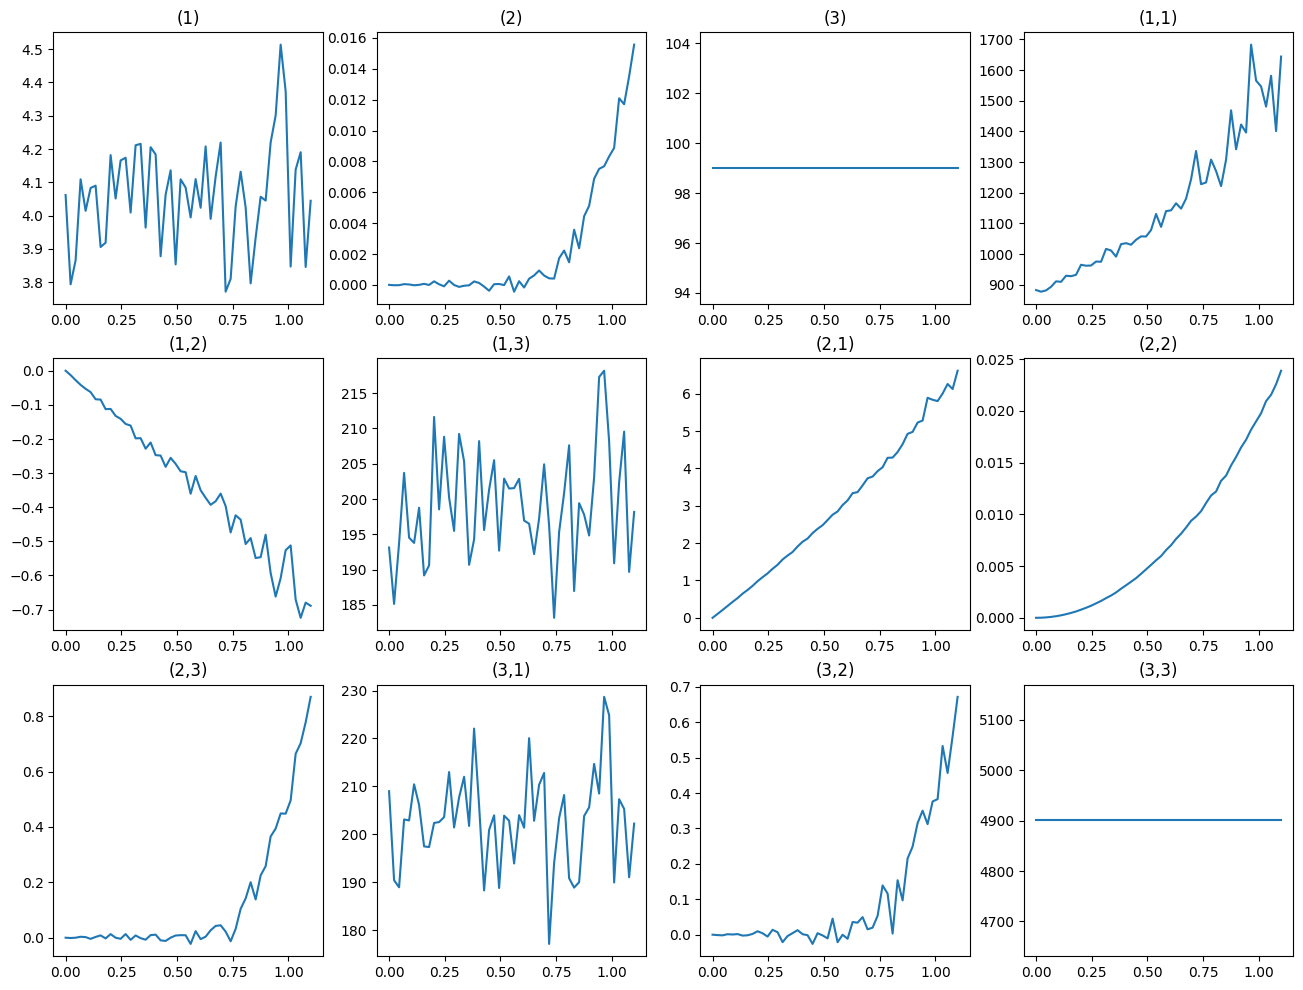

In [25]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.plot(sigmas, Exp_signatures_results_sigmas.T[i])


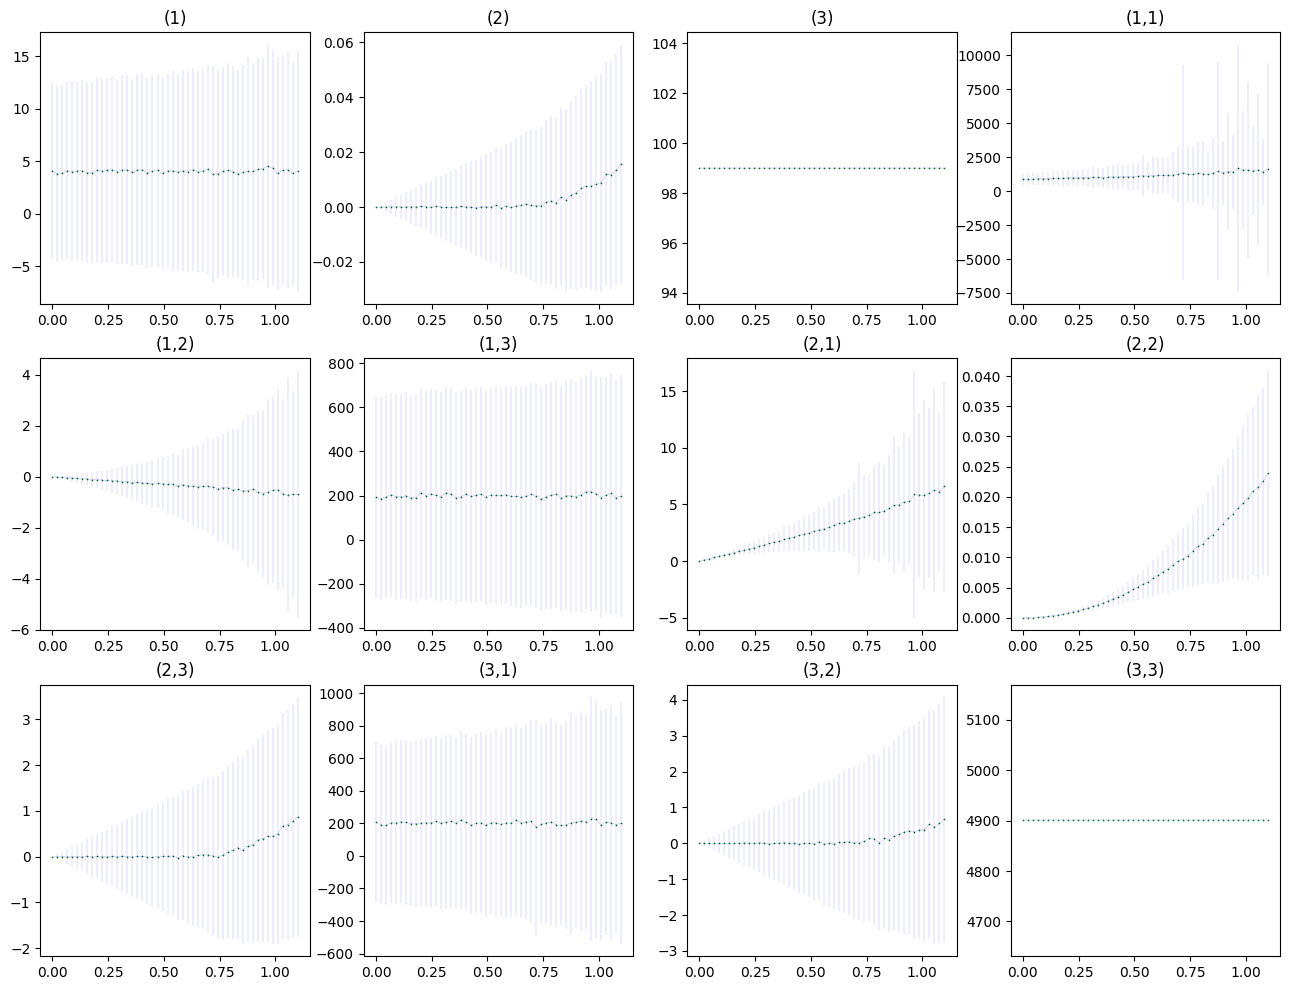

In [26]:
# plots with 0.2*Std
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.scatter(sigmas,Exp_signatures_results_sigmas.T[i], color='green', linewidth=0.15, s=1, alpha=1)
    ax.errorbar(sigmas, Exp_signatures_results_sigmas.T[i],0.2*Std_sign_signatory_sigmas.T[i], linewidth=0.1, color='blue')

In [27]:
# Parameters for calculations
thetas= np.linspace(0.01,0.8,50) #Long run variance θ
kappas= 2 # Mean reversion κ
v_0s = thetas #  Initial variance
rhos = 0.6 #Correlation ρ, correlation between the log-returns and volatility of the asset
sigmas = 0.6 #Volatility of variance σ
rs = 0.04

S = 100
paths = 100000
steps = 100
T = 1

In [28]:
def signatures_calculations_thetas(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths):
    count=0
    for theta in thetas:
            # Caclulation of 10000 paths of prices and sigmas
            prices_1, sigs_1 = generate_heston_paths(S, T, r, kappa, theta, theta, rho, sigma, steps, paths, return_vol=True)

            for j in range(paths):
                     prices_and_sigs_with_time_tensor[j] = torch.tensor([prices_1[j], sigs_1[j], time_array]).T
                    #     shape of prices_and_sigs_witout_time_tensor=torch.Size([10000, 100, 3])

            sign_ps_signatory_differentranges[count] = signatory.signature(prices_and_sigs_with_time_tensor, depth_of_sig)
            #     shape of  sign_ps_signatory_differentranges=torch.Size([500, 10000, 12])

            Exp_sign_signatory_results[count] = torch.mean(sign_ps_signatory_differentranges[count], axis=0)
            #     shape of  Exp_sign_signatory_results=torch.Size([500, 12])
            Std_sign_signatory_results[count] = torch.std(sign_ps_signatory_differentranges[count],dim=0)
            #     shape of  Std_sign_signatory_results=torch.Size([50, 12])

            count = count + 1
    return sign_ps_signatory_differentranges,Exp_sign_signatory_results,Std_sign_signatory_results

In [29]:
results_thetas=signatures_calculations_thetas(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths)
signatures_results_thetas=results_thetas[0]
Exp_signatures_results_thetas=results_thetas[1]
Std_sign_signatory_thetas=results_thetas[2]

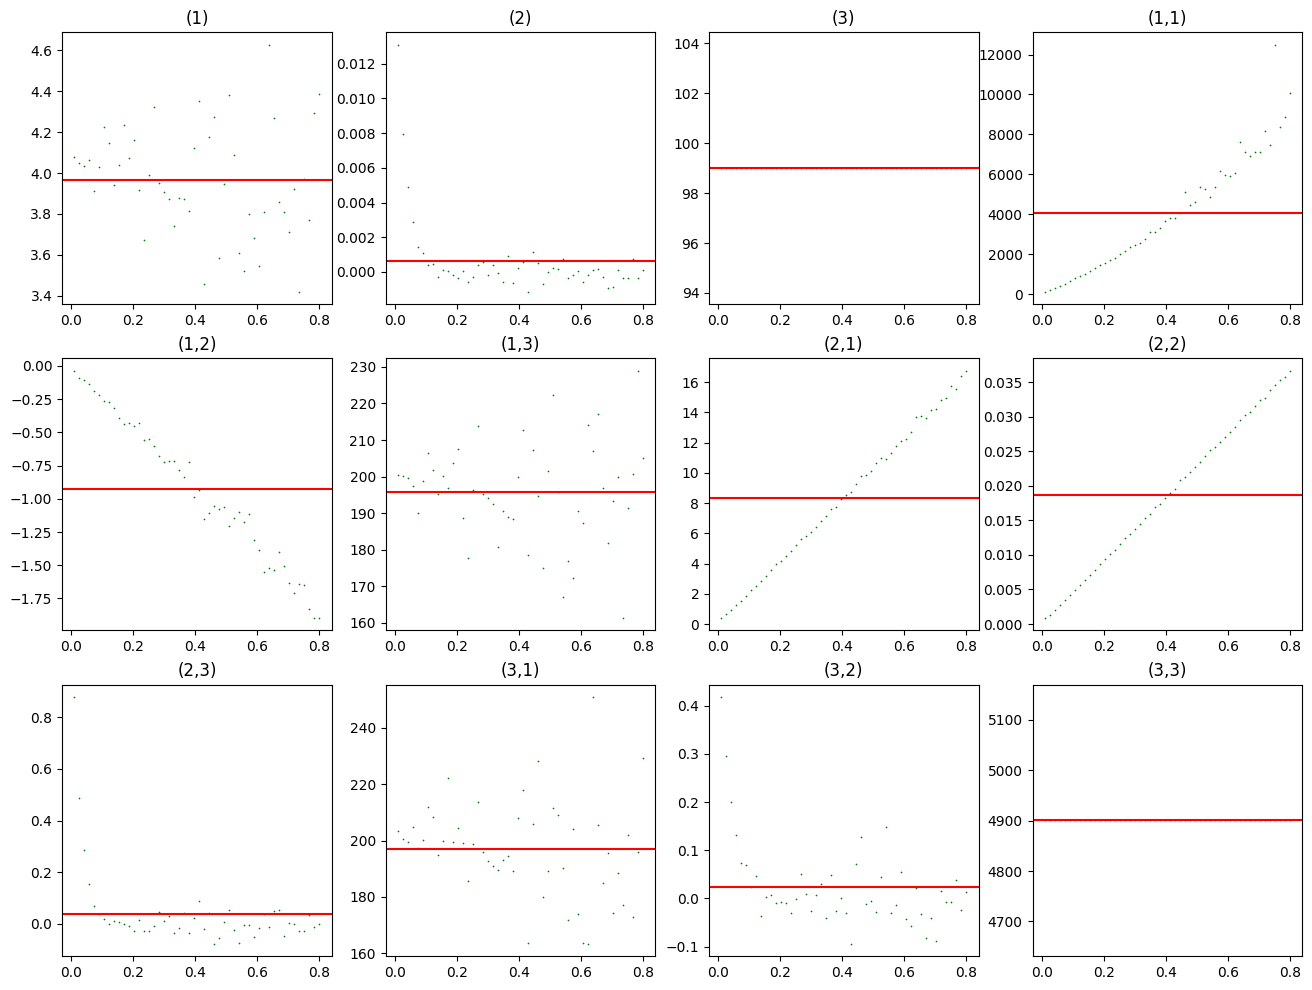

In [30]:
# Plot the scatter plots of components of the expected signatures
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.scatter(thetas,Exp_signatures_results_thetas.T[i], color='green', linewidth=0.15, s=1, alpha=1)
    ax.axhline(torch.mean(Exp_signatures_results_thetas.T[i]), color='red')


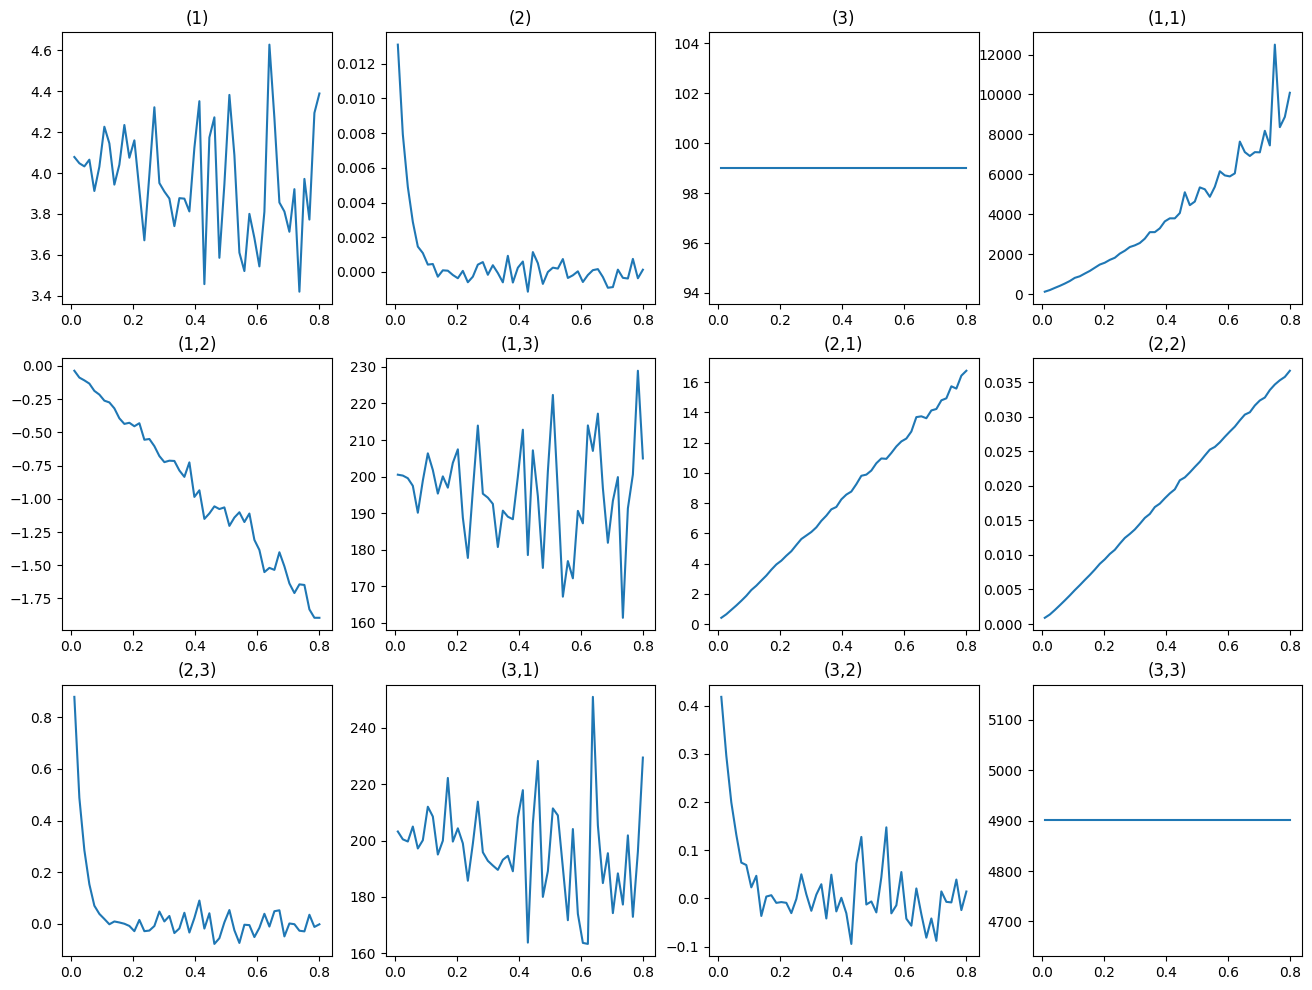

In [31]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.plot(thetas,Exp_signatures_results_thetas.T[i])

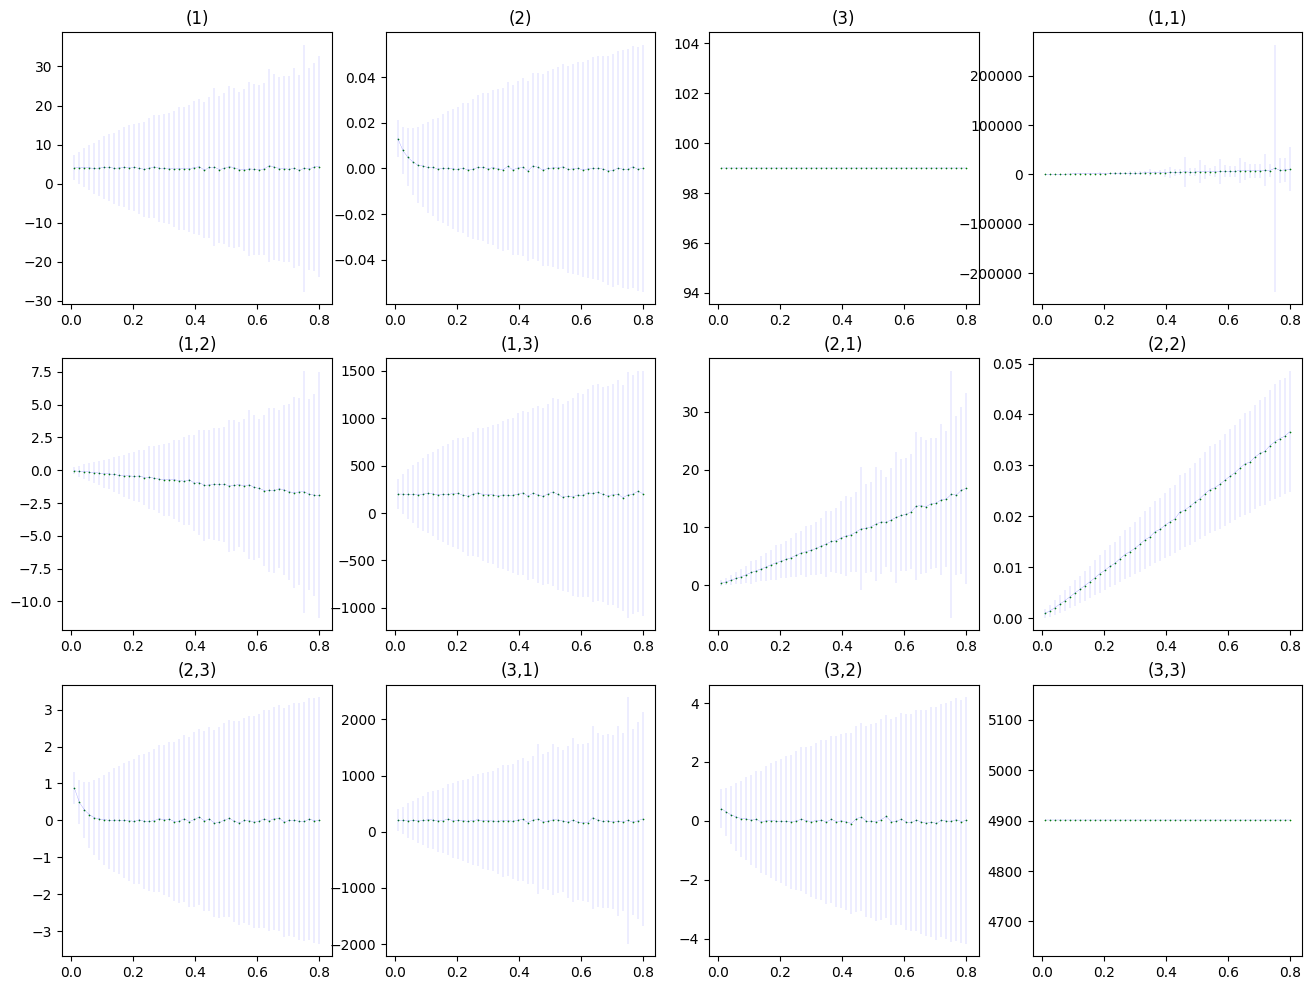

In [32]:
# plots with 0.2*Std
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.scatter(thetas,Exp_signatures_results_thetas.T[i], color='green', linewidth=0.15, s=1, alpha=1)
    ax.errorbar(thetas, Exp_signatures_results_thetas.T[i],0.2*Std_sign_signatory_thetas.T[i], linewidth=0.1, color='blue')


In [6]:
# Parameters for calculations
thetas=0.15 #Long run variance θ
kappas= 2 # Mean reversion κ
v_0s = thetas #  Initial variance
rhos = 0.6 #Correlation ρ, correlation between the log-returns and volatility of the asset
sigmas = 0.6 #Volatility of variance σ
rs = np.linspace(0.01,0.15,50)

S = 100
paths = 100000
steps = 100
T = 1

In [7]:
def signatures_calculations_rs(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths):
    count=0
    for r in rs:
            # Caclulation of 10000 paths of prices and sigmas
            prices_1, sigs_1 = generate_heston_paths(S, T, r, kappas, thetas, thetas, rhos, sigmas, steps, paths, return_vol=True)

            for j in range(paths):
                     prices_and_sigs_with_time_tensor[j] = torch.tensor([prices_1[j], sigs_1[j], time_array]).T
                    #     shape of prices_and_sigs_witout_time_tensor=torch.Size([10000, 100, 3])

            sign_ps_signatory_differentranges[count] = signatory.signature(prices_and_sigs_with_time_tensor, depth_of_sig)
            #     shape of  sign_ps_signatory_differentranges=torch.Size([500, 10000, 12])

            Exp_sign_signatory_results[count] = torch.mean(sign_ps_signatory_differentranges[count], axis=0)
            #     shape of  Exp_sign_signatory_results=torch.Size([500, 12])
            Std_sign_signatory_results[count] = torch.std(sign_ps_signatory_differentranges[count],dim=0)
            #     shape of  Std_sign_signatory_results=torch.Size([50, 12])

            count = count + 1
    return sign_ps_signatory_differentranges,Exp_sign_signatory_results, Std_sign_signatory_results

In [8]:
results_rs=signatures_calculations_rs(S, T, rs, kappas, thetas, v_0s, rhos, sigmas, steps, paths)
signatures_results_rs=results_rs[0]
Exp_signatures_results_rs=results_rs[1]
Std_sign_signatory_thetas=results_rs[2]

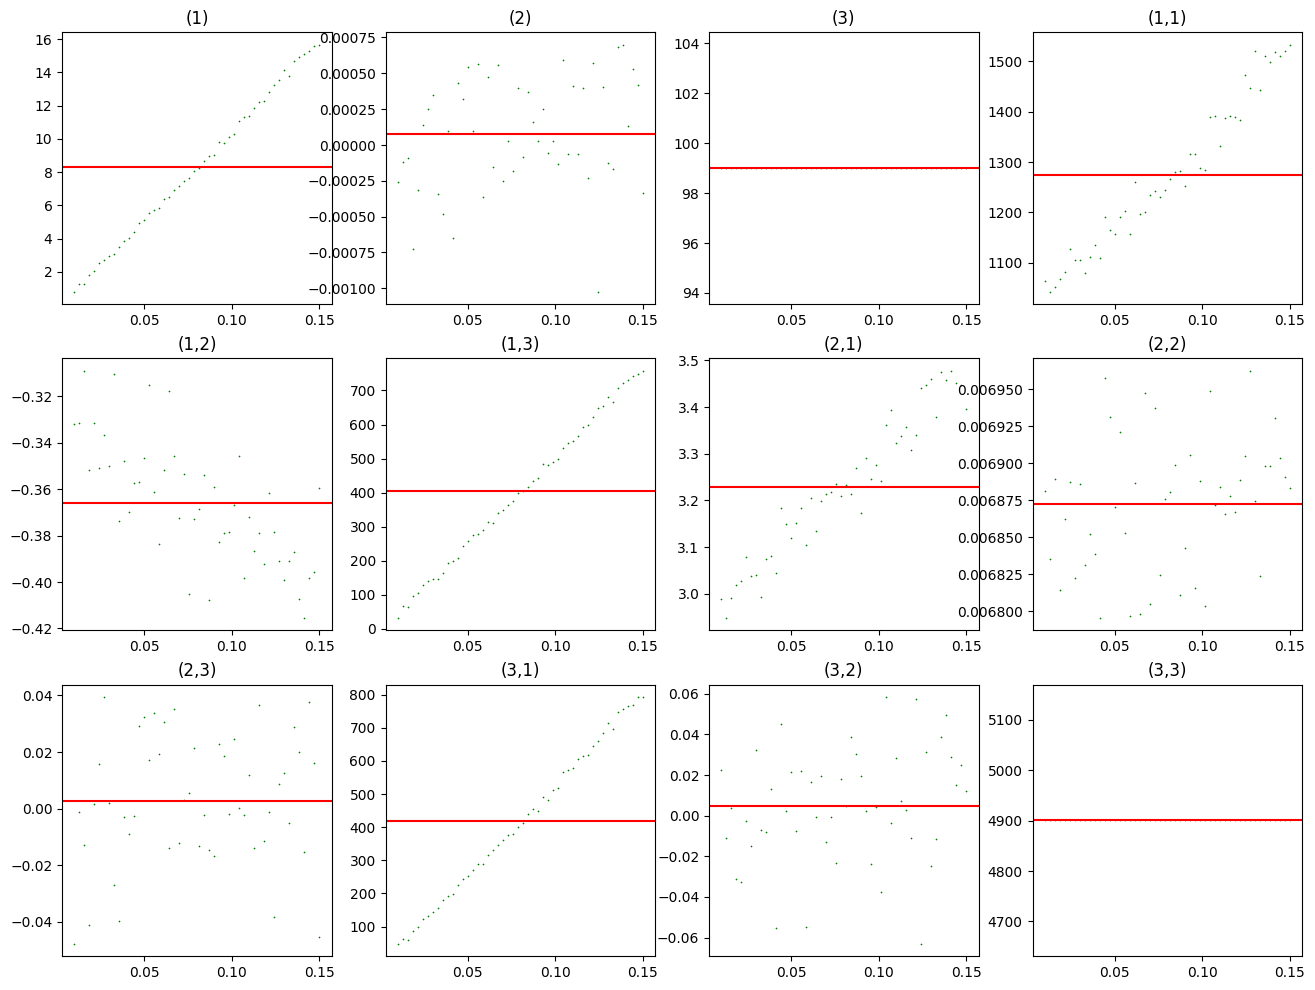

In [9]:
# Plot the scatter plots of components of the expected signatures
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.scatter(rs,Exp_signatures_results_rs.T[i], color='green', linewidth=0.15, s=1, alpha=1)
    ax.axhline(torch.mean(Exp_signatures_results_rs.T[i]), color='red')

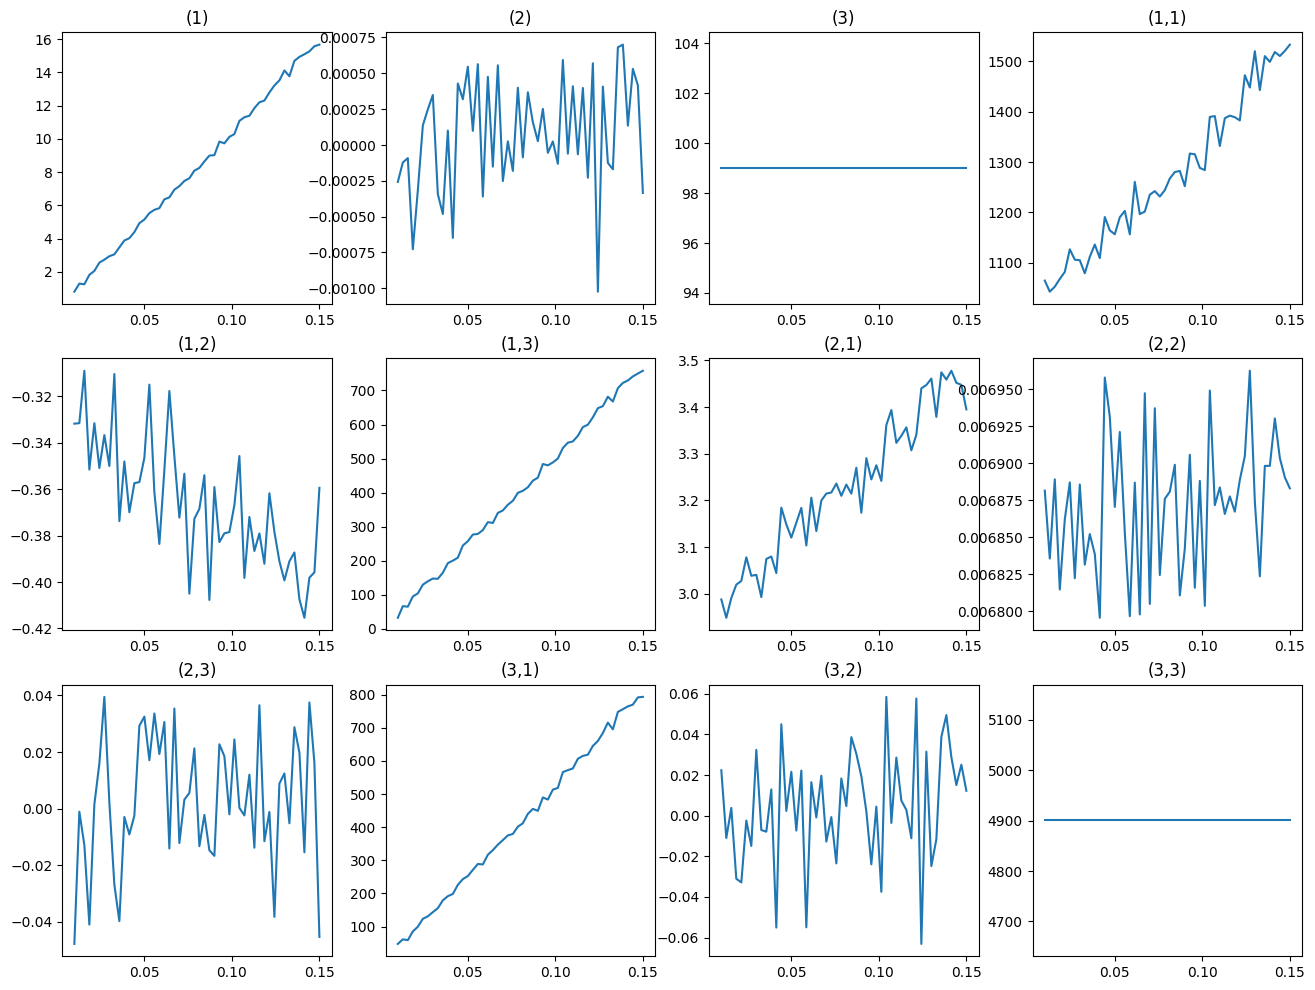

In [10]:
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.plot(rs, Exp_signatures_results_rs.T[i])


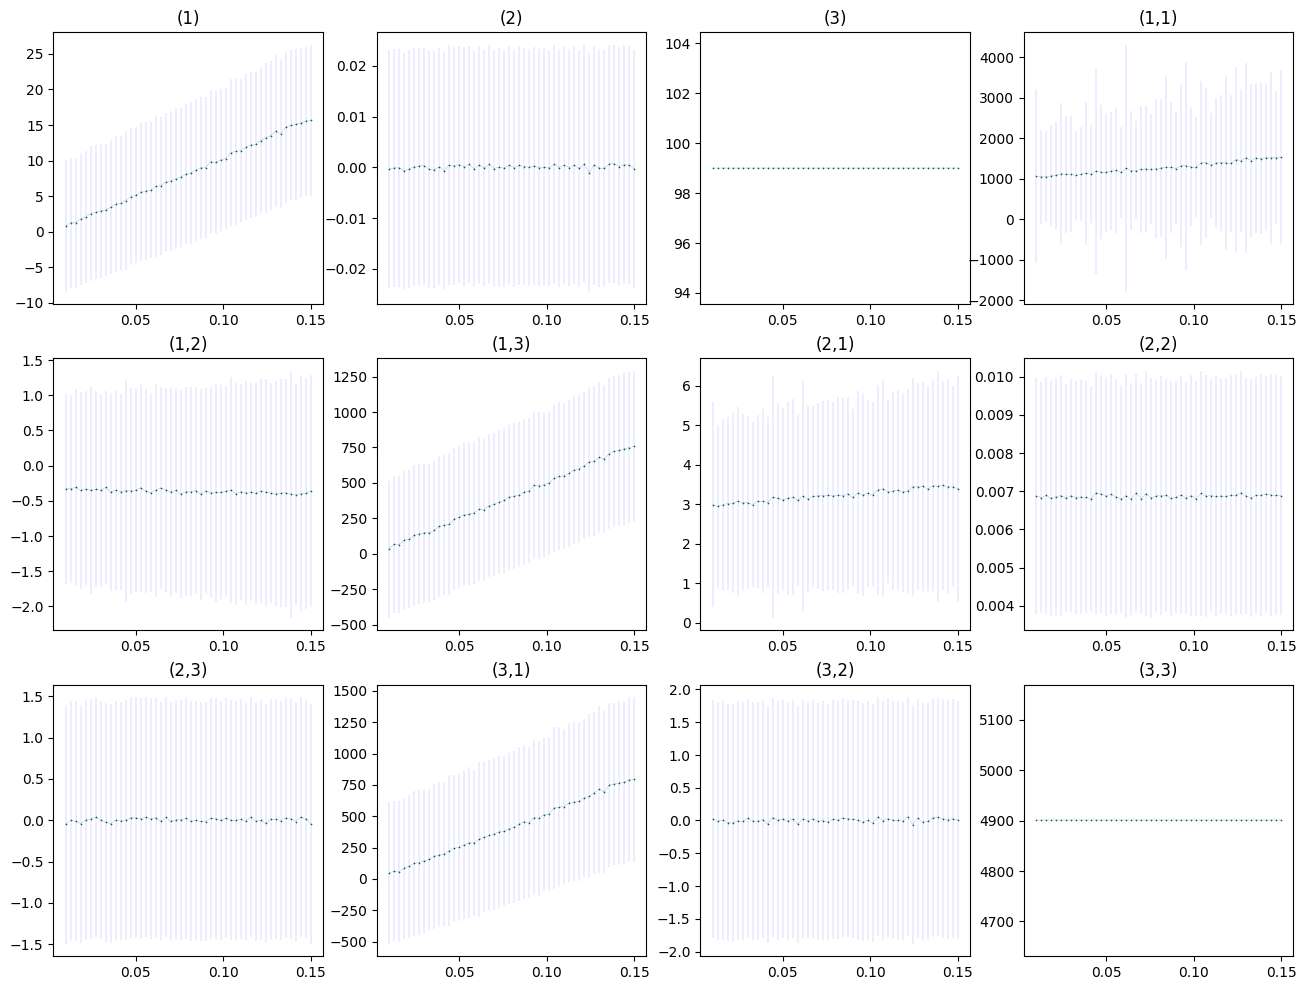

In [11]:
# plots with 0.2*Std
fig, axs = plt.subplots(3, 4, figsize=(4*4, 3*4))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.title.set_text(sig_keys.split()[i+1])
    ax.scatter(rs,Exp_signatures_results_rs.T[i], color='green', linewidth=0.15, s=1, alpha=1)
    ax.errorbar(rs, Exp_signatures_results_rs.T[i],0.2*Std_sign_signatory_thetas.T[i], linewidth=0.1, color='blue')
